In [1]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import scipy.io as spio

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter

from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import pearsonr

from scipy.stats import norm

import isolearn.io as isoio

from analyze_leslie_apadb_celltypes_helpers import *


In [2]:
#Load Leslie/APADB data
leslie_tissue_index = np.array(['hek293', 'mcf10a_hras2', 'mcf10a1', 'mcf10a2', 'mcf10a_hras1', 'bcells1', 'mcf7', 'bcells2', 'ovary', 'breast', 'brain', 'skmuscle', 'blcl', 'hES', 'testis', 'hela', 'ntera'], dtype=np.object)
apadb_tissue_index = np.array(['kidney', 'pancreas', 'monocytes', 'all', 'pdac', 'prcc', 'full_blood', 'hlf'], dtype=np.object)

#Load PAS dataframe and cut matrix
native_dict = isoio.load('../data/prepared_data/apa_leslie_apadb_data/apa_leslie_apadb_data')

#Load predictions
model_name = 'aparent_theano_legacy_30_31_34_pasaligned_padded'
pred_dict = isoio.load('predictions/apa_leslie_apadb_data/' + model_name + '_predictions')

#Join measurements with predictions
df, leslie_isoform_count, apadb_isoform_count, leslie_cleavage_count_dict, leslie_cleavage_prob_dict, pred_cleavage_prob = join_pas_dataframes(native_dict, pred_dict, leslie_tissue_index, apadb_tissue_index)

#Load Leslie/APADB pairwise APA dataframe
pair_dict = isoio.load('../data/prepared_data/apa_leslie_apadb_pair_data/apa_leslie_apadb_pair_data')

#Load predictions
model_name = 'aparent_apadb_fitted_legacy_pasaligned_padded'
pair_pred_dict = isoio.load('predictions/apa_leslie_apadb_pair_data/' + model_name + '_predictions')

#Join measurements with predictions
pair_df, leslie_cleavage_count_prox_dict, leslie_cleavage_prob_prox_dict, leslie_cleavage_count_dist_dict, leslie_cleavage_prob_dist_dict, pred_cleavage_prob_prox, pred_cleavage_prob_dist = join_apa_dataframes(pair_dict, pair_pred_dict, leslie_tissue_index, apadb_tissue_index)


In [3]:
#Basic Leslie/APADB Stats

print('Leslie Total Read Count = ' + str(np.sum(df['leslie_count_apadb_region_pooled'])))
print('Leslie Avg Pooled Read Count = ' + str(np.mean(df['leslie_count_apadb_region_pooled'])))
print('Leslie Avg Pooled Read Count (Non-zero) = ' + str(np.mean(df.query("leslie_count_apadb_region_pooled > 0")['leslie_count_apadb_region_pooled'])))
print('Leslie Avg Read Count / Tissue = ' + str(np.mean(leslie_isoform_count)))

print('APADB Total Read Count = ' + str(np.sum(df['apadb_count_pooled'])))
print('APADB Avg Pooled Read Count = ' + str(np.mean(df['apadb_count_pooled'])))
print('APADB Avg Pooled Read Count (Non-zero) = ' + str(np.mean(df.query("apadb_count_pooled > 0")['apadb_count_pooled'])))
print('APADB Avg Read Count / Tissue = ' + str(np.mean(apadb_isoform_count)))


Leslie Total Read Count = 35882341.0
Leslie Avg Pooled Read Count = 690.5230736663844
Leslie Avg Pooled Read Count (Non-zero) = 1783.6825073321072
Leslie Avg Read Count / Tissue = 40.61900433331673
APADB Total Read Count = 16791397.0
APADB Avg Pooled Read Count = 323.13518974674776
APADB Avg Pooled Read Count (Non-zero) = 323.13518974674776
APADB Avg Read Count / Tissue = 40.61097827342006


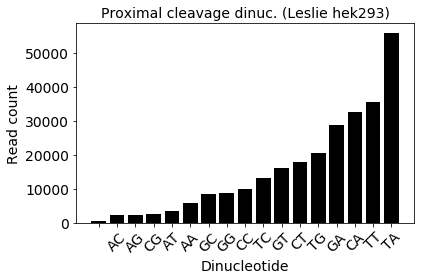

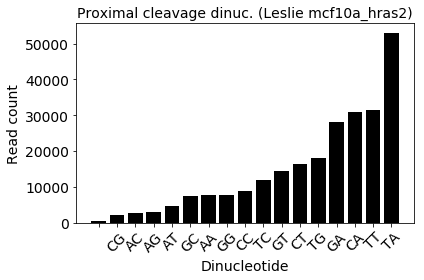

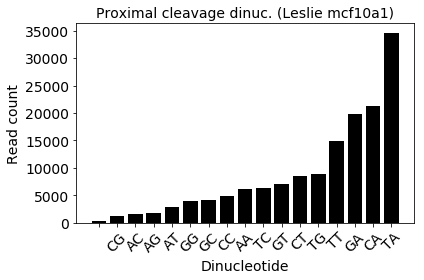

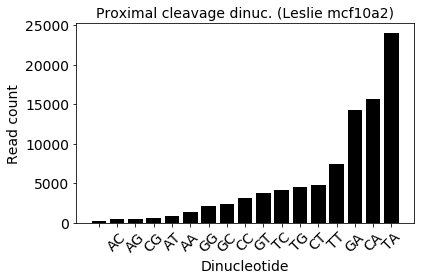

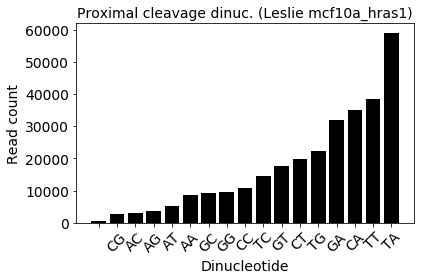

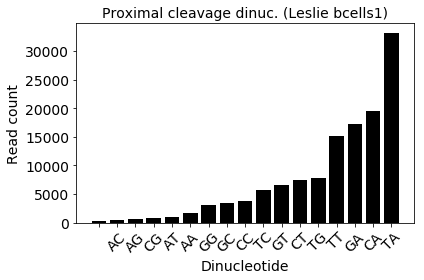

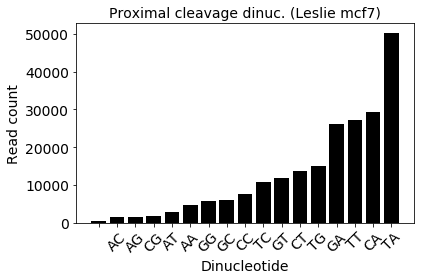

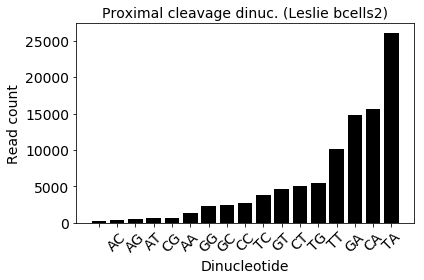

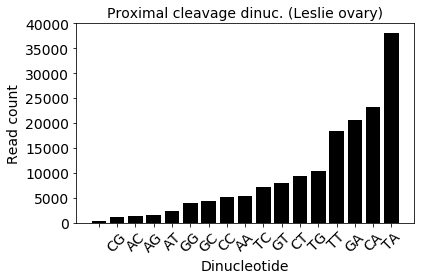

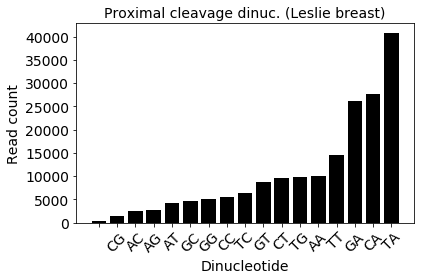

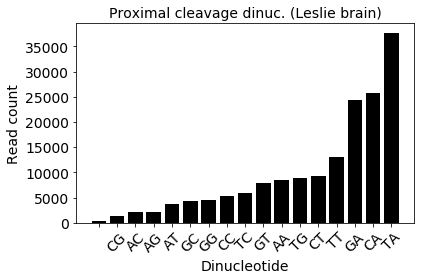

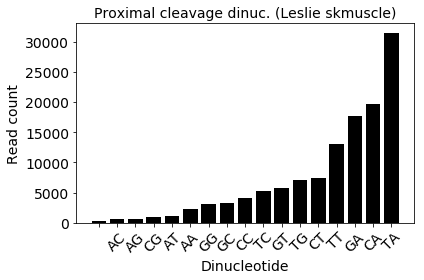

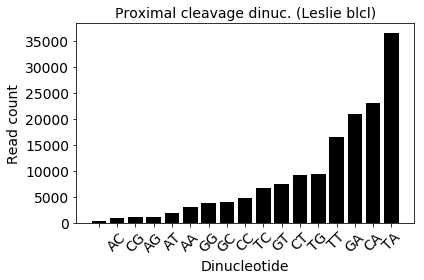

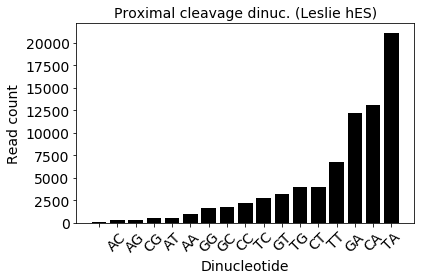

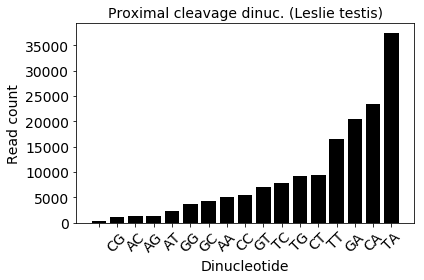

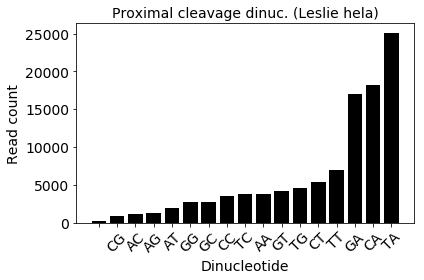

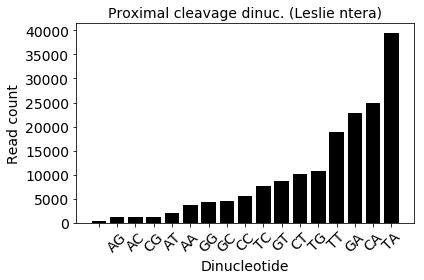

In [4]:
for tissue_i in range(0, len(leslie_tissue_index)) :
    cell_type = leslie_tissue_index[tissue_i]
    plot_cut_2mers(df, cell_type, leslie_cleavage_count_dict[cell_type], seq_column='seq')

Read depth across Leslie pA site measurements (Mean/Pooled across cell types).


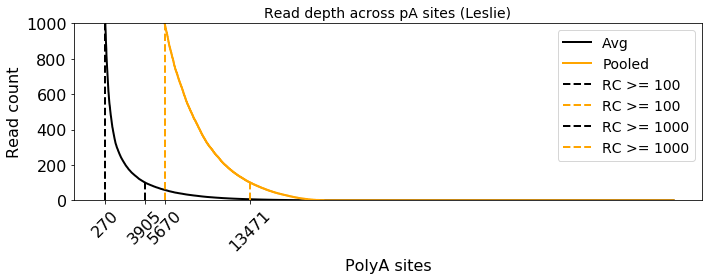

Read depth across APADB pA site measurements (Mean/Pooled across tissues).


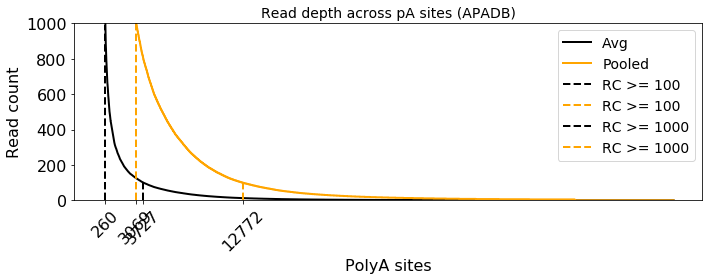

In [8]:
print("Read depth across Leslie pA site measurements (Mean/Pooled across cell types).")
plot_read_coverage_distribution(leslie_isoform_count, 'Leslie')

print("Read depth across APADB pA site measurements (Mean/Pooled across tissues).")
plot_read_coverage_distribution(apadb_isoform_count, 'APADB')

Leslie total read count statistics per cell type.


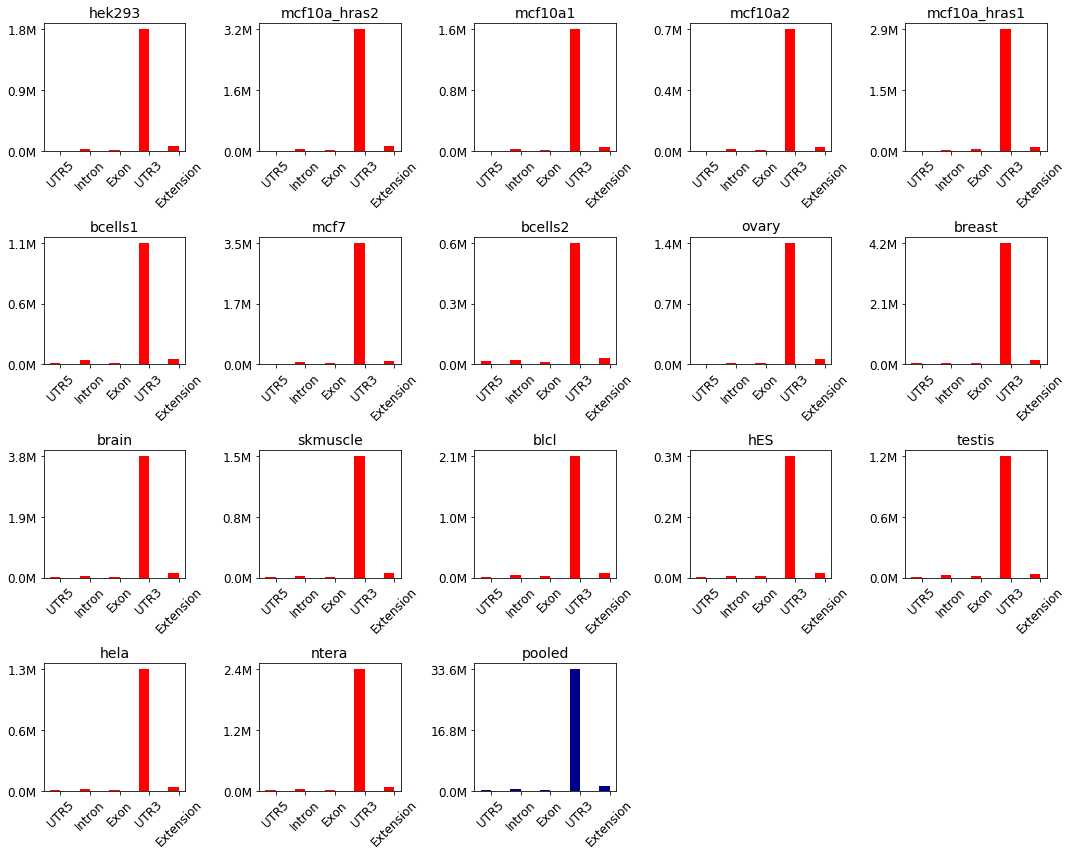

APADB total read count statistics per tissue.


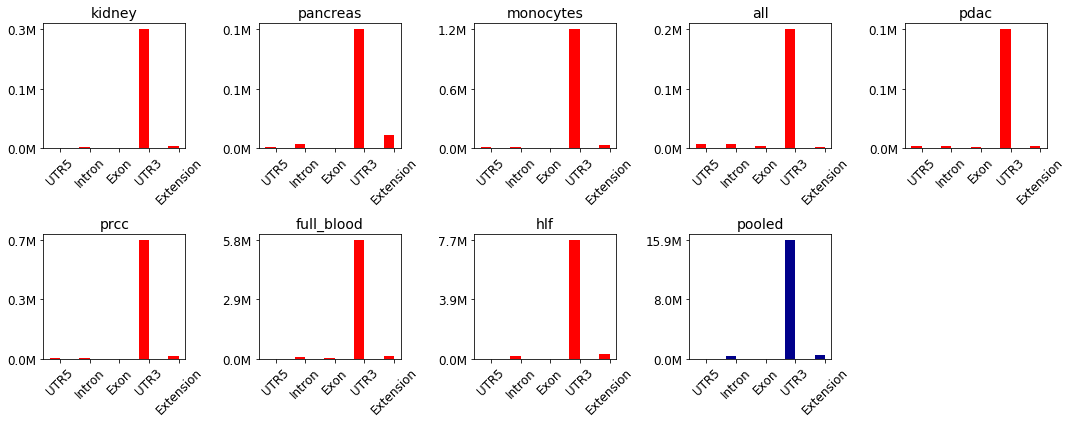

In [6]:
print('Leslie total read count statistics per cell type.')
leslie_tissue_index_extended = np.concatenate([leslie_tissue_index, np.array(['pooled'])])
plot_tissue_read_count_histo(df, 'leslie', leslie_tissue_index_extended, n_rows=4, n_cols=5)

print('APADB total read count statistics per tissue.')
apadb_tissue_index_extended = np.concatenate([apadb_tissue_index, np.array(['pooled'])])
plot_tissue_read_count_histo(df, 'apadb', apadb_tissue_index_extended, n_rows=2, n_cols=5)

Fraction of intronic pA reads across Leslie cell types.


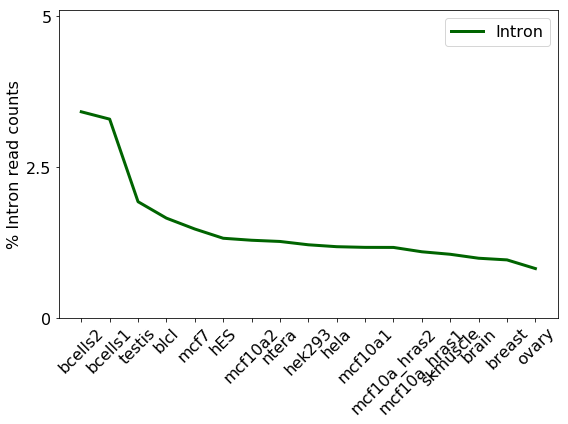

Fraction of intronic pA reads across APADB cell types.


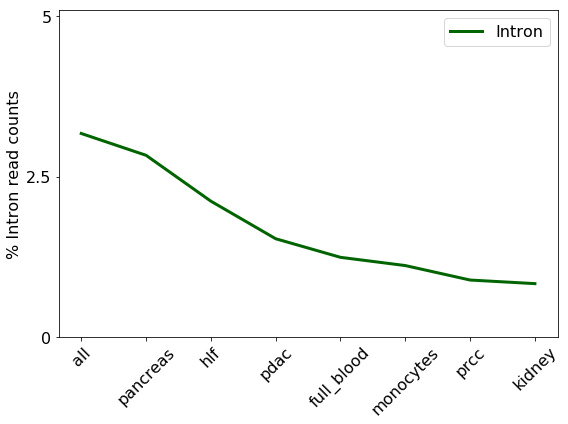

In [7]:
print('Fraction of intronic pA reads across Leslie cell types.')
plot_site_type_fractions(df, 'leslie', leslie_tissue_index)

print('Fraction of intronic pA reads across APADB cell types.')
plot_site_type_fractions(df, 'apadb', apadb_tissue_index)

Intronic, Exonic and 3' UTR Cleavage distribution pooled across cell types (Leslie data).


/home/johli/anaconda3/envs/aparent/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


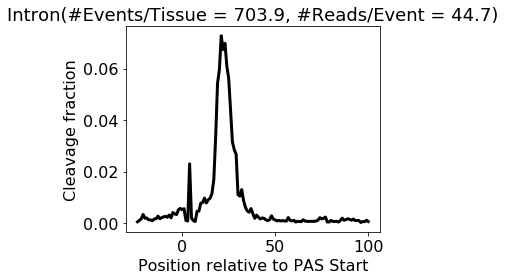

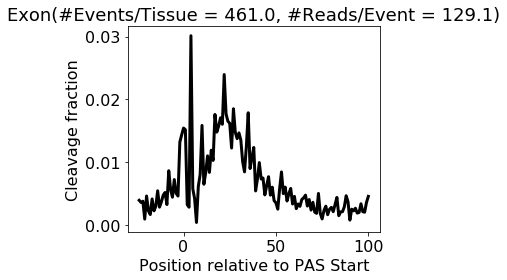

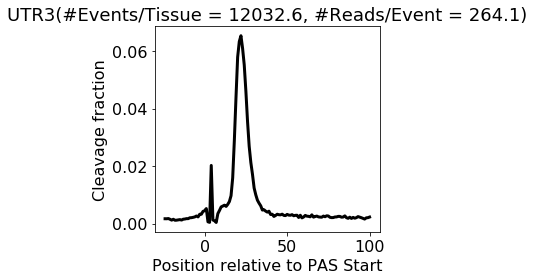

3' UTR Cleavage distribution per cell type (Leslie data).


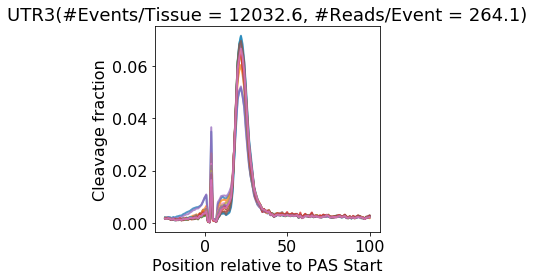

In [4]:
#Mean of normalized cleavage counts, pooled and per cell type of the Leslie dataset

print('Intronic, Exonic and 3\' UTR Cleavage distribution pooled across cell types (Leslie data).')
plot_cut_distributions(df, leslie_tissue_index, leslie_cleavage_count_dict, ['Intron', 'Exon', 'UTR3'], plot_tissue_specific=False, plot_pooled=True)

print('3\' UTR Cleavage distribution per cell type (Leslie data).')
plot_cut_distributions(df, leslie_tissue_index, leslie_cleavage_count_dict, ['UTR3'], plot_tissue_specific=True, plot_pooled=False)
